# Ï†àÏ∞®

1. Î¨¥ÏÜç Í¥ÄÎ†® Ïú†ÌäúÎ∏å Ï±ÑÎÑê ÌõÑÎ≥¥ Î¶¨Ïä§Ìä∏ ÏûêÎèô ÏàòÏßë
2. Íµ¨ÎèÖÏûê Ïàò, ÏóÖÎ°úÎìú Ïàò Í∏∞Ï§ÄÏúºÎ°ú ÌïÑÌÑ∞
3. ÏµúÍ∑º 1ÎÖÑ ÎÇ¥ ÏòÅÏÉÅÎ™©Î°ù ÌôïÎ≥¥
4. ÌëúÎ≥∏ 300Ìé∏ Î¨¥ÏûëÏúÑ Ï∂îÏ∂ù
5. Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•(.xlsx)

In [30]:
from googleapiclient.discovery import build
from tqdm import tqdm
import pandas as pd
import numpy as np

In [16]:
# API Key ÏÑ∏ÌåÖ
with open('apikey.txt') as f:
    API_KEY = f.read().strip()
youtube = build('youtube', 'v3', developerKey=API_KEY)

In [17]:
def search_channels_by_keyword(keyword, max_results=40):
    results = []
    req = youtube.search().list(
        q=keyword,
        type='channel',
        part='snippet',
        maxResults=max_results
    )
    res = req.execute()
    for item in res['items']:
        results.append({
            'channel_id': item['snippet']['channelId'],
            'channel_title': item['snippet']['title'],
            'keyword': keyword
        })
    return results


In [21]:
# 2. Í≤ÄÏÉâ ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏
SEARCH_KEYWORDS = ['Î¨¥Îãπ', 'Î¨¥ÏÜç', 'Ïã†Íµø', 'ÍµøÎãπ', 'Ïö©ÌïúÏ†êÏßë', 'Ïã†Ï†ê']

In [34]:
all_channels = []
for kw in SEARCH_KEYWORDS:
    all_channels.extend(search_channels_by_keyword(kw, max_results=50))

In [35]:
all_channels

[{'channel_id': 'UCajLD-PJlWxl79EaU4CsEyA',
  'channel_title': 'Ï∞êÎ¨¥Îãπ Ïó¨Î¨¥Í∞ïÏã†Ï†ï',
  'keyword': 'Î¨¥Îãπ'},
 {'channel_id': 'UCxd6YDhvRmBtIPfNjYi0yuw',
  'channel_title': 'Î¨¥ÎãπÏùòÎ™®Îì†Í≤É',
  'keyword': 'Î¨¥Îãπ'},
 {'channel_id': 'UCX_B5kCJjGWjHZwEi_ocWWQ',
  'channel_title': 'Î∞ïÏÇ¨Î¨¥Îãπ Ï≤úÎ™ÖÎèÑÏÇ¨',
  'keyword': 'Î¨¥Îãπ'},
 {'channel_id': 'UCrMBLGzYhQBnB5eq00VMV0g',
  'channel_title': 'Î¨¥ÎãπÌåêÎèÖÍ∏∞',
  'keyword': 'Î¨¥Îãπ'},
 {'channel_id': 'UCOd0Gj9G6KpHKdN_xl2eRvA',
  'channel_title': 'Î¨¥ÎãπÍ≥†Ï∂òÏûê',
  'keyword': 'Î¨¥Îãπ'},
 {'channel_id': 'UCRAAOkMnOxEPfy7wA98iVBg',
  'channel_title': 'ÎçîÌîΩ _ [THEPICK] Ï∞®Ìä∏Î¨¥Îãπ',
  'keyword': 'Î¨¥Îãπ'},
 {'channel_id': 'UC7oHImEHcHwUKeza4i9xL6Q',
  'channel_title': 'ÎãπÏßÑÏ†êÏßë Î¨¥ÎãπÍπÄÏòÅÏõî',
  'keyword': 'Î¨¥Îãπ'},
 {'channel_id': 'UCSryiBmC5Oue0htOFT_h3mQ',
  'channel_title': 'Ï°∞ÏÑ†Î¨¥Îãπ TV',
  'keyword': 'Î¨¥Îãπ'},
 {'channel_id': 'UCGEaQpgUtfIINT0KSzSMTCQ',
  'channel_title': 'Î∞ïÏàòÎ¨¥ÎãπÍ∞úÎò•Ïù¥',
  'keyword':

In [36]:
len(all_channels)

300

In [37]:
# DataFrameÏúºÎ°ú Ï†ïÎ¶¨
df_channels = pd.DataFrame(all_channels).drop_duplicates('channel_id')
df_channels.head()

channel_id channel_title keyword
0  UCajLD-PJlWxl79EaU4CsEyA     Ï∞êÎ¨¥Îãπ Ïó¨Î¨¥Í∞ïÏã†Ï†ï      Î¨¥Îãπ
1  UCxd6YDhvRmBtIPfNjYi0yuw        Î¨¥ÎãπÏùòÎ™®Îì†Í≤É      Î¨¥Îãπ
2  UCX_B5kCJjGWjHZwEi_ocWWQ     Î∞ïÏÇ¨Î¨¥Îãπ Ï≤úÎ™ÖÎèÑÏÇ¨      Î¨¥Îãπ
3  UCrMBLGzYhQBnB5eq00VMV0g         Î¨¥ÎãπÌåêÎèÖÍ∏∞      Î¨¥Îãπ
4  UCOd0Gj9G6KpHKdN_xl2eRvA         Î¨¥ÎãπÍ≥†Ï∂òÏûê      Î¨¥Îãπ

In [38]:
def get_channel_stats(channel_ids):
    stats = []
    for ch_id in tqdm(channel_ids):
        req = youtube.channels().list(
            id=ch_id,
            part='snippet,statistics'
        )
        res = req.execute()
        for item in res['items']:
            stats.append({
                'channel_id': ch_id,
                'channel_title': item['snippet']['title'],
                'subs': int(item['statistics'].get('subscriberCount', 0)),
                'video_count': int(item['statistics'].get('videoCount', 0)),
                'published_at': item['snippet']['publishedAt']
            })
    return pd.DataFrame(stats)

In [39]:

channel_ids = df_channels['channel_id'].tolist()
df_meta = get_channel_stats(channel_ids)
# ÌïÑÌÑ∞: Íµ¨ÎèÖÏûê 1Îßå‚Üë, ÏòÅÏÉÅ 20Ìé∏‚Üë
df_meta = df_meta[(df_meta['subs'] >= 10000) & (df_meta['video_count'] >= 20)]
df_meta.head()

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 289/289 [00:28<00:00,  9.99it/s]


channel_id        channel_title    subs  video_count  \
0  UCajLD-PJlWxl79EaU4CsEyA            Ï∞êÎ¨¥Îãπ Ïó¨Î¨¥Í∞ïÏã†Ï†ï   10700          325   
3  UCrMBLGzYhQBnB5eq00VMV0g                Î¨¥ÎãπÌåêÎèÖÍ∏∞  143000          608   
4  UCOd0Gj9G6KpHKdN_xl2eRvA                Î¨¥ÎãπÍ≥†Ï∂òÏûê  109000          943   
5  UCRAAOkMnOxEPfy7wA98iVBg  ÎçîÌîΩ _ [THEPICK] Ï∞®Ìä∏Î¨¥Îãπ   20700          950   
6  UC7oHImEHcHwUKeza4i9xL6Q           ÎãπÏßÑÏ†êÏßë Î¨¥ÎãπÍπÄÏòÅÏõî   20000           58   

                  published_at  
0         2018-09-25T00:19:31Z  
3  2023-10-18T07:59:02.564648Z  
4         2015-06-30T12:29:15Z  
5  2022-11-10T11:01:58.490635Z  
6  2024-02-19T08:18:09.976353Z

In [53]:
df_meta.shape

(56, 5)

In [54]:
df_meta[['channel_title', 'subs', 'video_count']].sort_values('subs', ascending=False)

channel_title     subs  video_count
172                         Ïó¥Î¶∞Í≥µÍ∞êTV  1070000         2126
164                            Ïú§ÏãúÏõê   846000         3435
31                       Î≤†Ïß±Ïù¥ÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏   497000         3239
201                        Ï†êÏßë Ïö©Íµ∞TV   464000        19468
38                       ÏåçÎ¨∏ÎèôÏï†Í∏∞ÏÑ†ÎÖÄTV   327000         1029
249                          ÏÇ¨Ï£ºÌïúÎ∞îÌÄ¥   282000         1013
23                     ÏùºÏÇ∞ÍΩÉÎåÄÏã†ÎãπÏù¥ÌôîÏ†ïÎßåÏã†   228000         1169
48                          ÏÇ∞Ïã†Î¨¥ÎãπTV   205000         1127
36                        Ïú†ÎØºÏßÄ Ìò∏Ïã†ÎßàÎßà   188000          224
40                         ÌïúÏö∏ÏóëÏÜåÏãúÏä§Ìä∏   172000          393
32                     Î¨¥Îãπ Î†àÏ†ÑÎìú Ïö©Íµ∞TV   153000         5281
3                            Î¨¥ÎãπÌåêÎèÖÍ∏∞   143000          608
7                          Ï°∞ÏÑ†Î¨¥Îãπ TV   111000          887
19                          ÏöîÏ¶ò Î¨¥ÎãπÎì§   109000         2850
4                            Î¨¥ÎãπÍ≥†Ï∂òÏûê   109000          943
9                          ÌïòÏö∏Ïã†Îãπ Ï≤úÎ¨¥   106000          877
241                           Ïã†Ï†êTV   105000         1509
52                             Î¨¥ÏÜçÏûÑ   103000          293
189                      ÎÇòÎùºÏã†Ïù∏Ï≤úÏö©ÌïúÏ†êÏßë    96900          441
18                           KÎ¨¥ÎãπÏ≤úÍµ≠    93400         1073
240                         Ïã†Ï†êÏùòÎ™®Îì†Í≤É    87300          199
127                           ÏßÄÏ≤≠Î™©Î†®    46800          110
253                Ï≤úÏÉÅÏÑ†ÎÖÄTV-Ïã†Ï†ê,ÏÇ¨Ï£º,Ïö¥ÏÑ∏    44900          244
229          Í≤ÄÎã®Îß§ÌôîÏÑ†ÎÖÄ #Ïö©ÌïúÏ†êÏßë#Ïã†ÎÇ¥Î¶º#Í≤ΩÍ∏∞Ï†êÏßë    41100          395
53                        ÌïòÎäòÎßûÏù¥Î¨¥ÏÜçÎåÄÌïô    31600         3817
286  Ï†ïÎèôÏàòÎ≤ïÏÇ¨TV Ïã†Ï†êTVÏö©Î¨∏Ï†ïÏÇ¨TVÈæçÈñÄÁ≤æËàçTV Âç†„ÅÑTV    29100         3968
218                  [Ïú†Î™ÖÌïúÏ†êÏßë]Í≤ΩÌù¨Í∂Å TV    27900         1005
227                            Ïö©Ï≤úÎãπ    27400          377
51                            Î¨¥ÏÜçTV    25800         1395
195                       Ïö©ÌïúÏ†êÏßë ÎßåÏàòÏïî    25000          161
26                        Î∞ïÏàòÎ¨¥Îãπ ÏòÅÎ™®Ï†Ñ    24700          120
81                   Î¨¥ÏÜçÏùÑ ÏùΩÏñ¥Ï£ºÎäî ÎèÑÎ¶¨Ïñ∏Îãà    24500          174
207                    ÎÇòÎùºÏû•Íµ∞-ÏÑúÏö∏Ïö©ÌïúÏ†êÏßë    21700          130
16                       ÏÑúÎåÄÎ¨∏Î¨¥ÎãπÎ∞±ÎßàÏû•Íµ∞    21000          476
10                         ÏàòÏßÑÎ≥¥ÏÇ¥ÎØ∏Ïö¥ÏÑ∏    20800          227
5              ÎçîÌîΩ _ [THEPICK] Ï∞®Ìä∏Î¨¥Îãπ    20700          950
190                       Ïö©ÌïúÏ†êÏßë ÎåÄÎßåÏ£º    20200          474
56                Î¨¥ÏÜçÏû¨ÌöåÏª®ÏÑ§ÌåÖ ÏùºÏõîÏã†Íµ≠ Ïã†Ï†ïÏÇ¨    20200         1004
6                       ÎãπÏßÑÏ†êÏßë Î¨¥ÎãπÍπÄÏòÅÏõî    20000           58
24                          Ï∞©Ìïú Î¨¥ÎãπÎì§    19600          214
65               Ïã†Î∞îÎûåTV Î¨¥ÏÜç,ÏùåÏïÖ,ÏòÅÌôî,ÌôçÎ≥¥    17400          401
55                            Î¨¥ÏÜçÎÇòÎùº    17400          822
13                            Î¨¥ÎãπÌïòÎ¶º    16900          462
43                         ÏÇ∞Ïã†Î¨¥ÎãπÏ≤úÏÉÅÌôî    16800         1769
33                           Ï™ΩÏßëÍ≤åÎ¨¥Îãπ    15400          126
17                          Î¨¥Îãπ ÍπÄÏùÄÌòú    14800          311
49                        Î¨¥Îãπ ÏùºÏõîÏÑ†ÎÖÄ     14400          222
41                           Î¨¥ÎãπÏ≤úÏã†Îãπ    14100          255
11                Ï†ÑÌÜµÎ¨∏ÌôîÏòàÏà†Ïù∏ Íµ≠Î™®Î¨¥Îãπ Î∞ïÎπÑÏ£º    13500          651
181                    Ï≤úÏÉÅÏ≤úÎÖÄ Ï≤úÌôîÎ≥¥ÏÇ¥TV    13400           74
179                           Î∞∞ÍºΩÎèÑÎ†π    13300          213
46                         Î¨¥ÎãπÏïàÏòÅÏã†TV    11700          189
243                           Ï†ïÏπòÏã†Ï†ê    11500           78
103                           Ï≤úÏôïÎ¨¥ÎÖÄ    10800          140
0                        Ï∞êÎ¨¥Îãπ Ïó¨Î¨¥Í∞ïÏã†Ï†ï    10700          325
274               ÏïàÏñë Î¨¥Î†πÏã†ÎÖÄ:Ïã†Ï†ê,ÏÇ¨Ï£º,ÌÉÄÎ°ú    10400          326

In [55]:
import datetime

def get_video_list_by_channel(channel_id, published_after, max_results=80):
    # published_after: "2023-05-01T00:00:00Z" ÌòïÌÉú
    videos = []
    req = youtube.search().list(
        channelId=channel_id,
        part='snippet',
        type='video',
        order='date',
        publishedAfter=published_after,
        maxResults=50
    )
    res = req.execute()
    for item in res['items']:
        videos.append({
            'channel_id': channel_id,
            'video_id': item['id']['videoId'],
            'title': item['snippet']['title'],
            'published_at': item['snippet']['publishedAt']
        })
    return videos



In [56]:
# ÏµúÍ∑º 1ÎÖÑ Í∏∞Ï§Ä ISO Ìè¨Îß∑
today = datetime.datetime.now()
one_year_ago = today - datetime.timedelta(days=365)
published_after = one_year_ago.strftime('%Y-%m-%dT%H:%M:%SZ')

all_videos = []
for ch_id in tqdm(df_meta['channel_id'].tolist()):
    videos = get_video_list_by_channel(ch_id, published_after)
    all_videos.extend(videos)

df_videos = pd.DataFrame(all_videos)
df_videos['published_at'] = pd.to_datetime(df_videos['published_at'])
df_videos = df_videos.drop_duplicates('video_id')
df_videos.head()

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 56/56 [00:19<00:00,  2.92it/s]


channel_id     video_id  \
0  UCajLD-PJlWxl79EaU4CsEyA  FYsxUjRcRfU   
1  UCajLD-PJlWxl79EaU4CsEyA  4ljIg3EiyWU   
2  UCajLD-PJlWxl79EaU4CsEyA  BzRRUPjaWew   
3  UCajLD-PJlWxl79EaU4CsEyA  54OmN-_Ml3k   
4  UCajLD-PJlWxl79EaU4CsEyA  KcLpijec1b8   

                                        title              published_at  
0                            Ï∞êÎ¨¥Îãπ Ïó¨Î¨¥Í∞ïÏã†Ï†ï ÎùºÏù¥Î∏å Î∞©ÏÜ° 2025-05-16 08:34:46+00:00  
1  Ïù∏ÏôïÏÇ∞ ü™®ÏπòÎßàÎ∞îÏúÑü™® Í∏∞ÎèÑÌÑ∞Ïóê Îã§ÎÖÄÏôîÏäµÎãàÎã§üíï #Ïù∏ÏôïÏÇ∞ #ÏπòÎßàÎ∞îÏúÑ #Ïû•Ìù¨ÎπàÍ∏∞ÎèÑÌÑ∞ 2025-05-02 03:00:14+00:00  
2          2025ÎÖÑ Îã§Í∞ÄÏò¨ ÌÅ∞ Ïû¨ÏïôÏùÄ?! #Ïó¨Î¨¥Í∞ïÏã†Ï†ï #Íµ≠Ïö¥ #ÎåÄÌïúÎØºÍµ≠ 2025-04-28 10:20:00+00:00  
3             ÏõÉÏúºÎ©¥ Î≥µÏù¥ Ïò§ÎãàÍπåÏöî~‚ò∫Ô∏è Ïó¨Îü¨Î∂Ñ Î™®Îëê Ïû¨Ïàò ÎßéÏù¥ Î∞õÏúºÏÑ∏ 2025-04-24 07:52:25+00:00  
4         Ïó≠ÎåÄÍ∏â Ïù¥Î≤§Ìä∏ ÎèÑÏ∞©üéÅ Íµ¨ÎèÖ ÌïòÏã† Î∂ÑÎì§ Íº≠ Î≥¥ÏÑ∏Ïöî!! #Ïó¨Î¨¥Í∞ïÏã†Ï†ï 2025-04-21 03:13:29+00:00

In [57]:
df_videos.shape

(2407, 4)

In [60]:
df_videos['published_at'].sort_values()

1009   2024-05-22 05:03:58+00:00
1008   2024-05-22 06:00:47+00:00
1709   2024-05-22 11:00:53+00:00
736    2024-05-22 13:11:35+00:00
532    2024-05-23 11:15:03+00:00
                  ...           
419    2025-05-21 11:15:02+00:00
1850   2025-05-21 11:22:52+00:00
1050   2025-05-21 12:44:46+00:00
1283   2025-05-21 12:58:33+00:00
1433   2025-05-21 13:00:06+00:00
Name: published_at, Length: 2407, dtype: datetime64[ns, UTC]

In [62]:
# Î¨¥ÏûëÏúÑ ÌëúÎ≥∏ Ï∂îÏ∂ú
import numpy as np

np.random.seed(42)

sampled_videos = []
for ch_id, group in df_videos.groupby('channel_id'):
    n = min(max(3, int(300 / len(df_meta))), 15)
    sampled = group.sample(n=min(n, len(group)), random_state=42)
    sampled_videos.append(sampled)

df_sample = pd.concat(sampled_videos, ignore_index=True)
# Ï§ëÎ≥µ/Ï¥ùÌï© 300¬±5 Ï°∞Ï†ï
if len(df_sample) > 300:
    df_sample = df_sample.sample(n=300, random_state=42)
df_sample.head()

channel_id     video_id  \
0  UC-yjT5qhjSWBfeupwjr3UrA  HMBqx_5Hbhs   
1  UC-yjT5qhjSWBfeupwjr3UrA  PxQYpoFgNIQ   
2  UC-yjT5qhjSWBfeupwjr3UrA  BD0VoR3Qt0A   
3  UC-yjT5qhjSWBfeupwjr3UrA  KqmDSniB1R0   
4  UC-yjT5qhjSWBfeupwjr3UrA  rRMJLNpMZTw   

                                               title              published_at  
0                         2025ÎÖÑ Ï§ëÎ∞òÍ∏∞ Ïö¥ÏÑ∏ [79ÎÖÑÏÉù ÏñëÎù† Í∏∞ÎØ∏ÏÉù] 2025-04-08 05:00:11+00:00  
1                         2025ÎÖÑ Ï§ëÎ∞òÍ∏∞ Ïö¥ÏÑ∏ [77ÎÖÑÏÉù Î±ÄÎù† Ï†ïÏÇ¨ÏÉù] 2025-03-24 11:04:32+00:00  
2  [Íµ≠Ïö¥ÏòàÏñ∏] ÎÇ¥Í∞Ä Î≥∏ ÎØ∏Îûò- 3Îã®Í≥ÑÏùò ÎåÄÏû¨Ïïô &quot;Î¨º, ÌïòÎäò, ÎïÖÏùò Ïû¨Ïïô&quot; 2025-05-06 02:11:26+00:00  
3                        2025ÎÖÑ Ï§ëÎ∞òÍ∏∞ Ïö¥ÏÑ∏ [71ÎÖÑÏÉù ÎèºÏßÄÎù† Ïã†Ìï¥ÏÉù] 2025-03-24 10:59:01+00:00  
4                        2025ÎÖÑ Ï§ëÎ∞òÍ∏∞ Ïö¥ÏÑ∏ [68ÎÖÑÏÉù ÏõêÏà≠Îù† Î¨¥Ïã†ÏÉù] 2025-03-28 11:36:42+00:00

In [63]:
df_sample

channel_id     video_id  \
0    UC-yjT5qhjSWBfeupwjr3UrA  HMBqx_5Hbhs   
1    UC-yjT5qhjSWBfeupwjr3UrA  PxQYpoFgNIQ   
2    UC-yjT5qhjSWBfeupwjr3UrA  BD0VoR3Qt0A   
3    UC-yjT5qhjSWBfeupwjr3UrA  KqmDSniB1R0   
4    UC-yjT5qhjSWBfeupwjr3UrA  rRMJLNpMZTw   
..                        ...          ...   
262  UCyjyfEkAg3gNJ-rKVN-P_KA  j_9eyVhjPS0   
263  UCyjyfEkAg3gNJ-rKVN-P_KA  LA_eHFseVto   
264  UCyjyfEkAg3gNJ-rKVN-P_KA  sShYCGkm0H4   
265  UCyjyfEkAg3gNJ-rKVN-P_KA  cE1ZY2aUpRc   
266  UCyjyfEkAg3gNJ-rKVN-P_KA  maG0LKwDHBA   

                                                 title  \
0                           2025ÎÖÑ Ï§ëÎ∞òÍ∏∞ Ïö¥ÏÑ∏ [79ÎÖÑÏÉù ÏñëÎù† Í∏∞ÎØ∏ÏÉù]   
1                           2025ÎÖÑ Ï§ëÎ∞òÍ∏∞ Ïö¥ÏÑ∏ [77ÎÖÑÏÉù Î±ÄÎù† Ï†ïÏÇ¨ÏÉù]   
2    [Íµ≠Ïö¥ÏòàÏñ∏] ÎÇ¥Í∞Ä Î≥∏ ÎØ∏Îûò- 3Îã®Í≥ÑÏùò ÎåÄÏû¨Ïïô &quot;Î¨º, ÌïòÎäò, ÎïÖÏùò Ïû¨Ïïô&quot;   
3                          2025ÎÖÑ Ï§ëÎ∞òÍ∏∞ Ïö¥ÏÑ∏ [71ÎÖÑÏÉù ÎèºÏßÄÎù† Ïã†Ìï¥ÏÉù]   
4                          2025ÎÖÑ Ï§ëÎ∞òÍ∏∞ Ïö¥ÏÑ∏ [68ÎÖÑÏÉù ÏõêÏà≠Îù† Î¨¥Ïã†ÏÉù]   
..                                                 ...   
262  Ï†ÄÏäπÏÇ¨ÏûêÍ∞Ä Î∂ÄÎ•¥Îäî Ïã†Ìò∏ÏùºÍπå... Ïûò Îïå ÏÜêÏù¥ ÏûêÍæ∏Îßå Ïò¨ÎùºÍ∞ÄÎ©¥ ÏïàÎêúÎã§Í≥†? [Ïú†ÎØºÏßÄÏùò ...   
263  Í∞ÄÏúÑÎàåÎ¶º ÎçïÎ∂ÑÏóê Î™©Ïà®Íµ¨Ìïú Ïã§Ï†úÏÇ¨Í±¥! Í∑∏Îïå Î∞úÎ∞ëÏóê ÎÇòÌÉÄÎÇ¨Îçò Í±¥ ÎèÑÎåÄÏ≤¥ ÎàÑÍµ¨ÏòÄÏùÑÍπå? [...   
264  Î¨¥ÎãπÏù¥ Îì§Î†§Ï£ºÎäî 4ÏãúÍ∞Ñ  Í≥µÌè¨ Ïã§Ìôî Í¥¥Îã¥ Î™®ÏùåÏßë! Î†àÏ†ÑÎìú ÏÇ¨Ïó∞Îì§Îßå Î™®ÏïòÎã§Í≥†?! [Ïú†...   
265  Í∞ìÏã†ÎÇ¥Î¶º Î∞õÏùÄ Ï†úÏûê ÌôîÏßÑÏÑ†ÎÖÄÍ∞Ä ÎπôÏùòÎêêÏóàÎçò ÏßÑÏßú Î¨¥ÏÑúÏö¥ ÏñòÍ∏∞.. Ïã§Ìôî Í≥µÌè¨ Í¥¥Îã¥ [Ïú†...   
266                (ENG) Ïòà? Î¨¥ÎãπÏù¥ Ïó∞Ïï†Î•º ÌïúÎã§Í≥†Ïöî? Ìóê~ [Ïã†Îì§Î¶∞ Ïó∞Ïï†2]   

                 published_at  
0   2025-04-08 05:00:11+00:00  
1   2025-03-24 11:04:32+00:00  
2   2025-05-06 02:11:26+00:00  
3   2025-03-24 10:59:01+00:00  
4   2025-03-28 11:36:42+00:00  
..                        ...  
262 2025-03-10 12:44:20+00:00  
263 2024-11-24 12:00:19+00:00  
264 2025-01-12 11:33:25+00:00  
265 2024-11-07 12:00:59+00:00  
266 2025-02-25 14:58:19+00:00  

[267 rows x 4 columns]

In [64]:
import matplotlib.pyplot as plt
from scipy.stats import chisquare


In [65]:
# 1. Ï±ÑÎÑêÎ≥Ñ Î∂ÑÌè¨
vid_counts = df_videos['channel_id'].value_counts().sort_index()
samp_counts = df_sample['channel_id'].value_counts().sort_index()


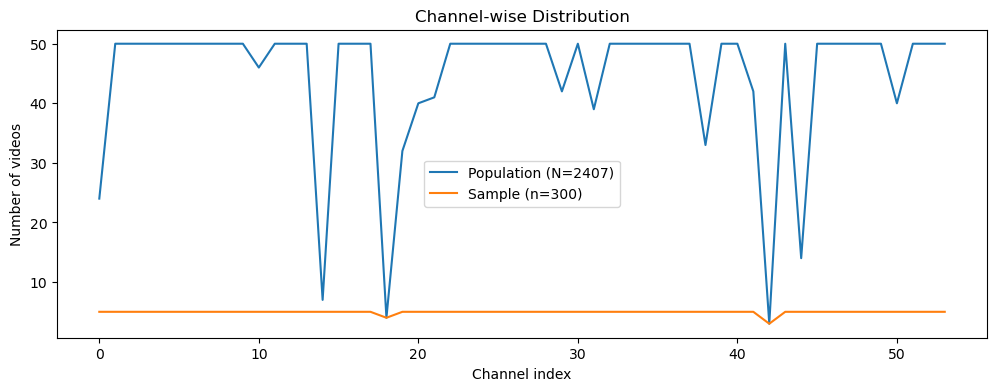

/var/folders/40/n3t1cznx7fndvzjmydb6y6n00000gn/T/ipykernel_45042/3330332115.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_videos['month'] = df_videos['published_at'].dt.to_period('M')
/var/folders/40/n3t1cznx7fndvzjmydb6y6n00000gn/T/ipykernel_45042/3330332115.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_sample['month'] = df_sample['published_at'].dt.to_period('M')


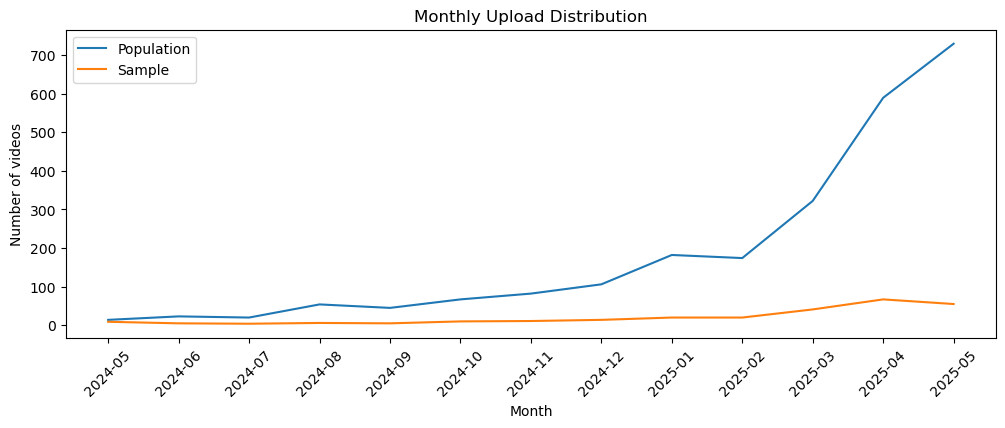

In [66]:
plt.figure(figsize=(12,4))
plt.plot(vid_counts.values, label='Population (N=2407)')
plt.plot(samp_counts.values, label='Sample (n=300)')
plt.title('Channel-wise Distribution')
plt.legend(); plt.xlabel('Channel index'); plt.ylabel('Number of videos')
plt.show()

# 2. ÏóÖÎ°úÎìúÏõî Î∂ÑÌè¨
df_videos['month'] = df_videos['published_at'].dt.to_period('M')
df_sample['month'] = df_sample['published_at'].dt.to_period('M')

vid_month = df_videos['month'].value_counts().sort_index()
samp_month = df_sample['month'].value_counts().sort_index()

plt.figure(figsize=(12,4))
plt.plot(vid_month.index.astype(str), vid_month.values, label='Population')
plt.plot(samp_month.index.astype(str), samp_month.values, label='Sample')
plt.title('Monthly Upload Distribution')
plt.xticks(rotation=45)
plt.legend(); plt.xlabel('Month'); plt.ylabel('Number of videos')
plt.show()

In [76]:
from scipy.stats import chisquare

# 1. Ï±ÑÎÑê Î™©Î°ù ÌÜµÏùº (Î™®ÏßëÎã®, ÌëúÎ≥∏Ïùò union)
all_channels = sorted(set(vid_counts.index) | set(samp_counts.index))

# 2. Í¥ÄÏ∏°Í∞í: ÌëúÎ≥∏ Ï±ÑÎÑêÎ≥Ñ ÏòÅÏÉÅÏàò (ÏóÜÏúºÎ©¥ 0)
obs = samp_counts.reindex(all_channels, fill_value=0)

# 3. Î™®ÏßëÎã® ÎπÑÏú® (ÏóÜÏúºÎ©¥ 0)
pop_counts = vid_counts.reindex(all_channels, fill_value=0)
exp_prop = pop_counts / pop_counts.sum()

# 4. Í∏∞ÎåÄÍ∞í: Î™®ÏßëÎã® ÎπÑÏú® √ó ÌëúÎ≥∏ Ï†ÑÏ≤¥ ÏòÅÏÉÅÏàò
f_exp = exp_prop * obs.sum()

# 5. Ìï©Í≥Ñ Î∞òÎìúÏãú ÏùºÏπò (sum(obs)==sum(f_exp))
print("Ìï©Í≥Ñ:", sum(obs), sum(f_exp))

# 6. chisquare Í≤ÄÏ†ï
chi2, p = chisquare(f_obs=obs, f_exp=f_exp)
print(f'Chi-square = {chi2:.2f}, p = {p:.3f}')
# p > 0.05Î©¥ 'Ïú†ÏùòÌïú Ï∞®Ïù¥ ÏóÜÏùå' ‚Üí ÎåÄÌëúÏÑ± ÏñëÌò∏

Ìï©Í≥Ñ: 267 267.00000000000017
Chi-square = 86.14, p = 0.003
